# Trying to re-configure the
- warm start, impute only missing
- warm start, impute all



Seed: 510
Upstream Model File Path: ./upstream_seq2seq/models/transformer_cnn_4heads_1701990699.9536803.pt
Num attention heads: 8


/home/david/anaconda3/lib/python3.9/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


2246929


Within epoch loss (validation) 0.43096: 100%|██████████| 433/433 [02:37<00:00,  2.74it/s]


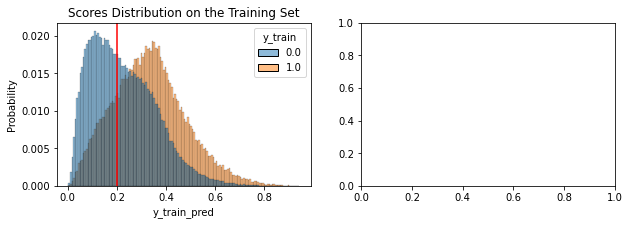

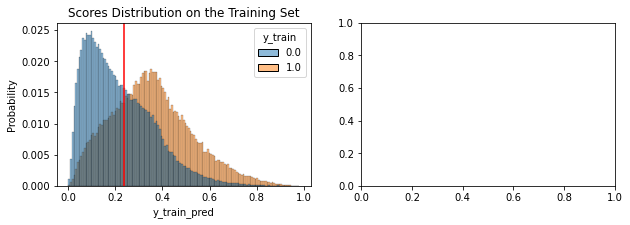

<Figure size 720x216 with 0 Axes>

In [5]:
import os
import sys
# sys.path.append('/home/david/Desktop/projects/thesis/')
os.chdir('/home/david/Desktop/projects/thesis/')

import numpy as np
import pickle 

from combined_downstream_upstream.utils.LoadModels import *
from combined_downstream_upstream.executors.train_combined_model import trainer


# upstream model params
# ---------------
upstream_params = {
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 8,                # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'positional_encodings': False,
    'device':'cuda'
}
best_rocauc_and_pr_auc = {
    'seed':[],
    'validation-roc-auc':[],
    'validation-pr-auc':[],
    'test-roc-auc':[],
    'test-pr-auc':[],
}

seed = 123
np.random.seed(123)
seeds = np.random.randint(0,1000, 50)


seed = seeds[0]

print('Seed:', seed)
upstream_model   = load_upstream_model(upstream_params, folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')
downstream_model = load_downstream_model(dropout=0.5,scale=1,num_inputs=12, weights_path='./downstream_classification/models/AF-V9/model_val_rocauc.pt')



config = {
        # general
        'seed':seed,
        'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
        'data_folder_path': './downstream_classification/data/individual-signals-registered/',
        'targets': ['AF'],
        'leads': ['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6'],

        # training
        'batch_size': 128,
        'n_epochs': 3,
        'weight_decay': 0, #0.3,
        'lr': 0.005,
        'eval_metric':'rocauc',
        'patience':2,
        'clip':1,
        'loss_function_weight':None,

        # Experiment settings
        'upstream_model':upstream_model,
        'downstream_model':downstream_model,
        'impute_only_missing':True,
        'continue_training_upstream_model':True,
        'model_saving_path':'./combined_downstream_upstream/models/other-experiments/1',

        'reconstruction_loss_weight':[0.2,]*3,

        # test
        'check_on_test':True,
        'plot':False,
        'plot_saving_path':'/home/david/Desktop/projects/thesis/combined_downstream_upstream/plots/other-experiments/1',

        }

best_rocauc_and_pr_auc_seed = trainer(**config)

best_rocauc_and_pr_auc['seed'].append(seed)
best_rocauc_and_pr_auc['validation-roc-auc'].append(best_rocauc_and_pr_auc_seed['validation-roc-auc'])
best_rocauc_and_pr_auc['validation-pr-auc'].append(best_rocauc_and_pr_auc_seed['validation-auc-pr'])
best_rocauc_and_pr_auc['test-roc-auc'].append(best_rocauc_and_pr_auc_seed['test-roc-auc'])
best_rocauc_and_pr_auc['test-pr-auc'].append(best_rocauc_and_pr_auc_seed['test-auc-pr'])

with open(config['model_saving_path']+'/best_rocauc_and_pr_auc.pkl', 'wb') as f:
    pickle.dump(best_rocauc_and_pr_auc, f)


# Weight positive

In [6]:
import os
os.chdir('/home/david/Desktop/projects/thesis/')
import pandas as pd
sample = pd.read_csv('./downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv')
display(sample['AF'].value_counts(normalize=True))
display(sample['AF'].value_counts())
278141/93166

0.0    0.749086
1.0    0.250914
Name: AF, dtype: float64

0.0    278141
1.0     93166
Name: AF, dtype: int64

2.985434600605371

## flag

cuda
Seed: 510
Upstream Model File Path: ./upstream_seq2seq/models/transformer_cnn_4heads_1701990699.9536803.pt
Num attention heads: 8


/home/david/anaconda3/lib/python3.9/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


2246929


Within epoch loss (validation) 1.2494: 100%|██████████| 433/433 [02:38<00:00,  2.74it/s] 


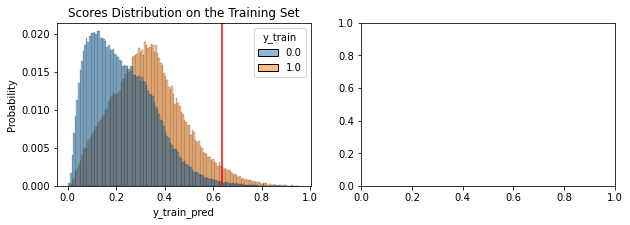

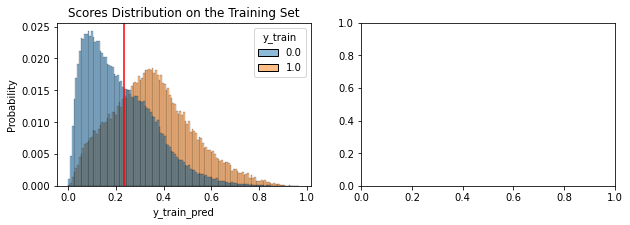

<Figure size 720x216 with 0 Axes>

In [1]:
import os
import sys
# sys.path.append('/home/david/Desktop/projects/thesis/')
os.chdir('/home/david/Desktop/projects/thesis/')

import numpy as np
import pickle 

from combined_downstream_upstream.utils.LoadModels import *
from combined_downstream_upstream.executors.train_combined_model import trainer


# upstream model params
# ---------------
upstream_params = {
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 8,                # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'positional_encodings': False,
    'device':'cuda'
}
best_rocauc_and_pr_auc = {
    'seed':[],
    'validation-roc-auc':[],
    'validation-pr-auc':[],
    'test-roc-auc':[],
    'test-pr-auc':[],
}

seed = 123
np.random.seed(123)
seeds = np.random.randint(0,1000, 50)


seed = seeds[0]

print('Seed:', seed)
upstream_model   = load_upstream_model(upstream_params, folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')
downstream_model = load_downstream_model(dropout=0.5,scale=1,num_inputs=12, weights_path='./downstream_classification/models/AF-V9/model_val_rocauc.pt')



config = {
        # general
        'seed':seed,
        'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
        'data_folder_path': './downstream_classification/data/individual-signals-registered/',
        'targets': ['AF'],
        'leads': ['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6'],

        # training
        'batch_size': 128,
        'n_epochs': 3,
        'weight_decay': 0, #0.3,
        'lr': 0.005,
        'eval_metric':'rocauc',
        'patience':2,
        'clip':1,
        'loss_function_weight':2.985434600605371,

        # Experiment settings
        'upstream_model':upstream_model,
        'downstream_model':downstream_model,
        'impute_only_missing':True,
        'continue_training_upstream_model':True,
        'model_saving_path':'./combined_downstream_upstream/models/other-experiments/2',

        'reconstruction_loss_weight':[0.2,]*3,

        # test
        'check_on_test':True,
        'plot':False,
        'plot_saving_path':'/home/david/Desktop/projects/thesis/combined_downstream_upstream/plots/other-experiments/2',

        }

best_rocauc_and_pr_auc_seed = trainer(**config)

best_rocauc_and_pr_auc['seed'].append(seed)
best_rocauc_and_pr_auc['validation-roc-auc'].append(best_rocauc_and_pr_auc_seed['validation-roc-auc'])
best_rocauc_and_pr_auc['validation-pr-auc'].append(best_rocauc_and_pr_auc_seed['validation-auc-pr'])
best_rocauc_and_pr_auc['test-roc-auc'].append(best_rocauc_and_pr_auc_seed['test-roc-auc'])
best_rocauc_and_pr_auc['test-pr-auc'].append(best_rocauc_and_pr_auc_seed['test-auc-pr'])

with open(config['model_saving_path']+'/best_rocauc_and_pr_auc.pkl', 'wb') as f:
    pickle.dump(best_rocauc_and_pr_auc, f)


Seed: 510
Upstream Model File Path: ./upstream_seq2seq/models/transformer_cnn_4heads_1701990699.9536803.pt
Num attention heads: 8


/home/david/anaconda3/lib/python3.9/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


2246929


Within epoch loss (validation) 3.71186: 100%|██████████| 433/433 [03:04<00:00,  2.35it/s]


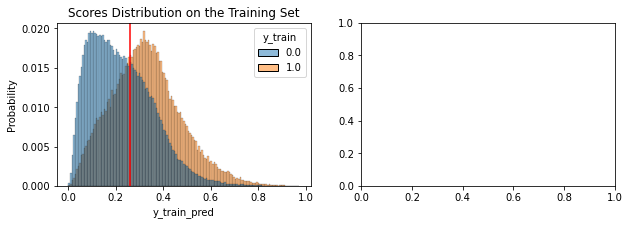

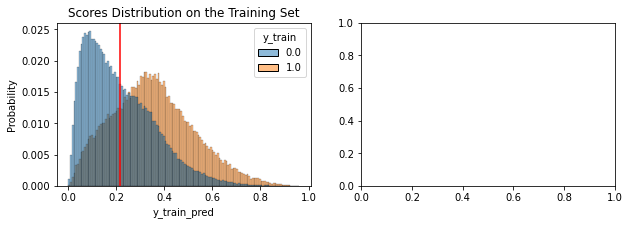

<Figure size 720x216 with 0 Axes>

In [3]:
import os
import sys
# sys.path.append('/home/david/Desktop/projects/thesis/')
os.chdir('/home/david/Desktop/projects/thesis/')

import numpy as np
import pickle 

from combined_downstream_upstream.utils.LoadModels import *
from combined_downstream_upstream.executors.train_combined_model import trainer


# upstream model params
# ---------------
upstream_params = {
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 8,                # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'positional_encodings': False,
    'device':'cuda'
}
best_rocauc_and_pr_auc = {
    'seed':[],
    'validation-roc-auc':[],
    'validation-pr-auc':[],
    'test-roc-auc':[],
    'test-pr-auc':[],
}

seed = 123
np.random.seed(123)
seeds = np.random.randint(0,1000, 50)


seed = seeds[0]

print('Seed:', seed)
upstream_model   = load_upstream_model(upstream_params, folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')
downstream_model = load_downstream_model(dropout=0.5,scale=1,num_inputs=12, weights_path='./downstream_classification/models/AF-V9/model_val_rocauc.pt')



config = {
        # general
        'seed':seed,
        'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
        'data_folder_path': './downstream_classification/data/individual-signals-registered/',
        'targets': ['AF'],
        'leads': ['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6'],

        # training
        'batch_size': 128,
        'n_epochs': 3,
        'weight_decay': 0, #0.3,
        'lr': 0.005,
        'eval_metric':'rocauc',
        'patience':2,
        'clip':1,
        'loss_function_weight':2.985434600605371*3,

        # Experiment settings
        'upstream_model':upstream_model,
        'downstream_model':downstream_model,
        'impute_only_missing':True,
        'continue_training_upstream_model':True,
        'model_saving_path':'./combined_downstream_upstream/models/other-experiments/3',

        'reconstruction_loss_weight':[0.2,]*3,

        # test
        'check_on_test':True,
        'plot':False,
        'plot_saving_path':'/home/david/Desktop/projects/thesis/combined_downstream_upstream/plots/other-experiments/3',

        }

best_rocauc_and_pr_auc_seed = trainer(**config)

best_rocauc_and_pr_auc['seed'].append(seed)
best_rocauc_and_pr_auc['validation-roc-auc'].append(best_rocauc_and_pr_auc_seed['validation-roc-auc'])
best_rocauc_and_pr_auc['validation-pr-auc'].append(best_rocauc_and_pr_auc_seed['validation-auc-pr'])
best_rocauc_and_pr_auc['test-roc-auc'].append(best_rocauc_and_pr_auc_seed['test-roc-auc'])
best_rocauc_and_pr_auc['test-pr-auc'].append(best_rocauc_and_pr_auc_seed['test-auc-pr'])

with open(config['model_saving_path']+'/best_rocauc_and_pr_auc.pkl', 'wb') as f:
    pickle.dump(best_rocauc_and_pr_auc, f)


# Using BCE from Logits
- The model above uses weigts in a wrong way. Because we use BCELoss, it returns a vector of `[batch_size,1]`. When the weight is a constant (or a `[1,1]` vector), it broadcasts it over the entire batch, causing the loss to be inflated but since all of the observations are multiplied, there is no change in the discrimination.
- When using BCEFromLogits we can add a weights in a vector of `[1,num_classes]`, where for binary `num_classes=2`. However, the downstream model has used `BCELoss` and I don't want to run it again. 

cuda
Seed: 510
Upstream Model File Path: ./upstream_seq2seq/models/transformer_cnn_4heads_1701990699.9536803.pt
Num attention heads: 8


/home/david/anaconda3/lib/python3.9/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


2246929


Within epoch loss (training) 3.91624:  21%|██        | 105/500 [01:19<05:00,  1.31it/s]


KeyboardInterrupt: 

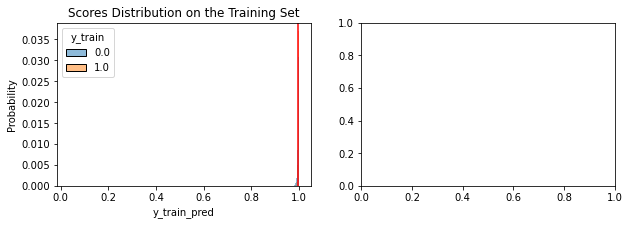

In [1]:
import os
import sys
# sys.path.append('/home/david/Desktop/projects/thesis/')
os.chdir('/home/david/Desktop/projects/thesis/')

import numpy as np
import pickle 

from combined_downstream_upstream.utils.LoadModels import *
from combined_downstream_upstream.executors.train_combined_model import trainer


# upstream model params
# ---------------
upstream_params = {
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 8,                # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'positional_encodings': False,
    'device':'cuda'
}
best_rocauc_and_pr_auc = {
    'seed':[],
    'validation-roc-auc':[],
    'validation-pr-auc':[],
    'test-roc-auc':[],
    'test-pr-auc':[],
}

seed = 123
np.random.seed(123)
seeds = np.random.randint(0,1000, 50)


seed = seeds[0]

print('Seed:', seed)
upstream_model   = load_upstream_model(upstream_params, folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')
downstream_model = load_downstream_model(dropout=0.5,scale=1,num_inputs=12, weights_path='./downstream_classification/models/AF-V9/model_val_rocauc.pt')



config = {
        # general
        'seed':seed,
        'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
        'data_folder_path': './downstream_classification/data/individual-signals-registered/',
        'targets': ['AF'],
        'leads': ['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6'],

        # training
        'batch_size': 128,
        'n_epochs': 2,
        'weight_decay': 0, #0.3,
        'lr': 0.005,
        'eval_metric':'rocauc',
        'patience':2,
        'clip':1,
        'loss_function_weight':2.985434600605371*300,

        # Experiment settings
        'upstream_model':upstream_model,
        'downstream_model':downstream_model,
        'impute_only_missing':True,
        'continue_training_upstream_model':True,
        'model_saving_path':'./combined_downstream_upstream/models/other-experiments/5',

        'reconstruction_loss_weight':[0.2,]*3,

        # test
        'check_on_test':True,
        'plot':False,
        'plot_saving_path':'/home/david/Desktop/projects/thesis/combined_downstream_upstream/plots/other-experiments/5',

        'training_steps': 500
        }

best_rocauc_and_pr_auc_seed = trainer(**config)

best_rocauc_and_pr_auc['seed'].append(seed)
best_rocauc_and_pr_auc['validation-roc-auc'].append(best_rocauc_and_pr_auc_seed['validation-roc-auc'])
best_rocauc_and_pr_auc['validation-pr-auc'].append(best_rocauc_and_pr_auc_seed['validation-auc-pr'])
best_rocauc_and_pr_auc['test-roc-auc'].append(best_rocauc_and_pr_auc_seed['test-roc-auc'])
best_rocauc_and_pr_auc['test-pr-auc'].append(best_rocauc_and_pr_auc_seed['test-auc-pr'])

with open(config['model_saving_path']+'/best_rocauc_and_pr_auc.pkl', 'wb') as f:
    pickle.dump(best_rocauc_and_pr_auc, f)


cuda
Seed: 510
Upstream Model File Path: ./upstream_seq2seq/models/transformer_cnn_4heads_1701990699.9536803.pt
Num attention heads: 8


/home/david/anaconda3/lib/python3.9/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


2246929


Within epoch loss (validation) 0.76142: 100%|██████████| 433/433 [03:30<00:00,  2.05it/s]


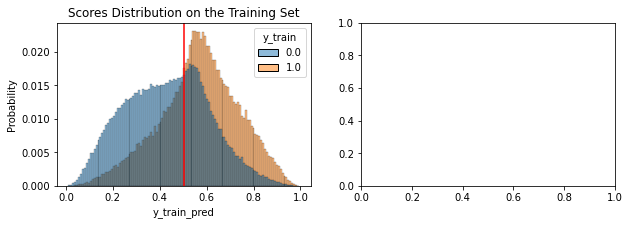

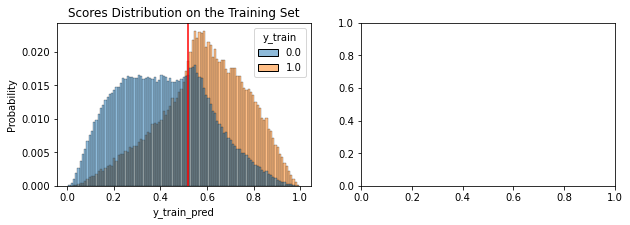

<Figure size 720x216 with 0 Axes>

In [1]:
import os
import sys
# sys.path.append('/home/david/Desktop/projects/thesis/')
os.chdir('/home/david/Desktop/projects/thesis/')

import numpy as np
import pickle 

from combined_downstream_upstream.utils.LoadModels import *
from combined_downstream_upstream.executors.train_combined_model import trainer


# upstream model params
# ---------------
upstream_params = {
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 8,                # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'positional_encodings': False,
    'device':'cuda'
}
best_rocauc_and_pr_auc = {
    'seed':[],
    'validation-roc-auc':[],
    'validation-pr-auc':[],
    'test-roc-auc':[],
    'test-pr-auc':[],
}

seed = 123
np.random.seed(123)
seeds = np.random.randint(0,1000, 50)


seed = seeds[0]

print('Seed:', seed)
upstream_model   = load_upstream_model(upstream_params, folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')
downstream_model = load_downstream_model(dropout=0.5,scale=1,num_inputs=12, weights_path='./downstream_classification/models/AF-V9/model_val_rocauc.pt')



config = {
        # general
        'seed':seed,
        'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
        'data_folder_path': './downstream_classification/data/individual-signals-registered/',
        'targets': ['AF'],
        'leads': ['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6'],

        # training
        'batch_size': 128,
        'n_epochs': 3,
        'weight_decay': 0, #0.3,
        'lr': 0.005,
        'eval_metric':'rocauc',
        'patience':2,
        'clip':1,
        'loss_function_weight':2.985434600605371,

        # Experiment settings
        'upstream_model':upstream_model,
        'downstream_model':downstream_model,
        'impute_only_missing':True,
        'continue_training_upstream_model':True,
        'model_saving_path':'./combined_downstream_upstream/models/other-experiments/6',

        'reconstruction_loss_weight':[0.2,]*3,

        # test
        'check_on_test':True,
        'plot':False,
        'plot_saving_path':'/home/david/Desktop/projects/thesis/combined_downstream_upstream/plots/other-experiments/6',

        'training_steps': np.inf
        }

best_rocauc_and_pr_auc_seed = trainer(**config)

best_rocauc_and_pr_auc['seed'].append(seed)
best_rocauc_and_pr_auc['validation-roc-auc'].append(best_rocauc_and_pr_auc_seed['validation-roc-auc'])
best_rocauc_and_pr_auc['validation-pr-auc'].append(best_rocauc_and_pr_auc_seed['validation-auc-pr'])
best_rocauc_and_pr_auc['test-roc-auc'].append(best_rocauc_and_pr_auc_seed['test-roc-auc'])
best_rocauc_and_pr_auc['test-pr-auc'].append(best_rocauc_and_pr_auc_seed['test-auc-pr'])

with open(config['model_saving_path']+'/best_rocauc_and_pr_auc.pkl', 'wb') as f:
    pickle.dump(best_rocauc_and_pr_auc, f)


In [1]:
import os
import sys
# sys.path.append('/home/david/Desktop/projects/thesis/')
os.chdir('/home/david/Desktop/projects/thesis/')

import numpy as np
import pickle 

from combined_downstream_upstream.utils.LoadModels import *
from combined_downstream_upstream.executors.train_combined_model import trainer


# upstream model params
# ---------------
upstream_params = {
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 8,                # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'positional_encodings': False,
    'device':'cuda'
}
best_rocauc_and_pr_auc = {
    'seed':[],
    'validation-roc-auc':[],
    'validation-pr-auc':[],
    'test-roc-auc':[],
    'test-pr-auc':[],
}

seed = 123
np.random.seed(123)
seeds = np.random.randint(0,1000, 50)


seed = seeds[0]

print('Seed:', seed)
upstream_model   = load_upstream_model(upstream_params, folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')
downstream_model = load_downstream_model(dropout=0.5,scale=1,num_inputs=12, weights_path='./downstream_classification/models/AF-V9/model_val_rocauc.pt', sigmoid_activision = False)



config = {
        # general
        'seed':seed,
        'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
        'data_folder_path': './downstream_classification/data/individual-signals-registered/',
        'targets': ['AF'],
        'leads': ['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6'],

        # training
        'batch_size': 128,
        'n_epochs': 2,
        'weight_decay': 0, #0.3,
        'lr': 0.005,
        'eval_metric':'rocauc',
        'patience':2,
        'clip':1,
        'loss_function_weight':[[2.985434600605371*300,0]],

        # Experiment settings
        'upstream_model':upstream_model,
        'downstream_model':downstream_model,
        'impute_only_missing':True,
        'continue_training_upstream_model':True,
        'model_saving_path':'./combined_downstream_upstream/models/other-experiments/5',

        'reconstruction_loss_weight':[0.2,]*3,

        # test
        'check_on_test':True,
        'plot':False,
        'plot_saving_path':'/home/david/Desktop/projects/thesis/combined_downstream_upstream/plots/other-experiments/5',

        }

best_rocauc_and_pr_auc_seed = trainer(**config)

best_rocauc_and_pr_auc['seed'].append(seed)
best_rocauc_and_pr_auc['validation-roc-auc'].append(best_rocauc_and_pr_auc_seed['validation-roc-auc'])
best_rocauc_and_pr_auc['validation-pr-auc'].append(best_rocauc_and_pr_auc_seed['validation-auc-pr'])
best_rocauc_and_pr_auc['test-roc-auc'].append(best_rocauc_and_pr_auc_seed['test-roc-auc'])
best_rocauc_and_pr_auc['test-pr-auc'].append(best_rocauc_and_pr_auc_seed['test-auc-pr'])

with open(config['model_saving_path']+'/best_rocauc_and_pr_auc.pkl', 'wb') as f:
    pickle.dump(best_rocauc_and_pr_auc, f)


cuda
Seed: 510
Upstream Model File Path: ./upstream_seq2seq/models/transformer_cnn_4heads_1701990699.9536803.pt
Num attention heads: 8


/home/david/anaconda3/lib/python3.9/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


2246929


Within epoch loss (training):   0%|          | 0/2051 [00:00<?, ?it/s]
../aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [0,0,0], thread: [32,0,0] Assertion `input_val >= zero && input_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [0,0,0], thread: [34,0,0] Assertion `input_val >= zero && input_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [0,0,0], thread: [35,0,0] Assertion `input_val >= zero && input_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [0,0,0], thread: [36,0,0] Assertion `input_val >= zero && input_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [0,0,0], thread: [37,0,0] Assertion `input_val >= zero && input_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [0,0,0], thread: [38,0,0] Assertion `input_val >= zero && input_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [0,0,

RuntimeError: output with shape [128, 1] doesn't match the broadcast shape [128, 2]

In [4]:
import os
import sys
# sys.path.append('/home/david/Desktop/projects/thesis/')
os.chdir('/home/david/Desktop/projects/thesis/')

import numpy as np
import pickle 

from combined_downstream_upstream.utils.LoadModels import *
from combined_downstream_upstream.executors.train_combined_model import trainer


# upstream model params
# ---------------
upstream_params = {
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 8,                # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'positional_encodings': False,
    'device':'cuda'
}
best_rocauc_and_pr_auc = {
    'seed':[],
    'validation-roc-auc':[],
    'validation-pr-auc':[],
    'test-roc-auc':[],
    'test-pr-auc':[],
}

seed = 123
np.random.seed(123)
seeds = np.random.randint(0,1000, 50)


seed = seeds[0]

print('Seed:', seed)
upstream_model   = load_upstream_model(upstream_params, folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')
downstream_model = load_downstream_model(dropout=0.5,scale=1,num_inputs=12, weights_path='./downstream_classification/models/AF-V9/model_val_rocauc.pt')



config = {
        # general
        'seed':seed,
        'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
        'data_folder_path': './downstream_classification/data/individual-signals-registered/',
        'targets': ['AF'],
        'leads': ['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6'],

        # training
        'batch_size': 128,
        'n_epochs': 3,
        'weight_decay': 0, #0.3,
        'lr': 0.01,
        'eval_metric':'rocauc',
        'patience':2,
        'clip':1,
        'loss_function_weight':2.985434600605371*3,

        # Experiment settings
        'upstream_model':upstream_model,
        'downstream_model':downstream_model,
        'impute_only_missing':True,
        'continue_training_upstream_model':True,
        'model_saving_path':'./combined_downstream_upstream/models/other-experiments/4',

        'reconstruction_loss_weight':[0.2,]*3,

        # test
        'check_on_test':True,
        'plot':False,
        'plot_saving_path':'/home/david/Desktop/projects/thesis/combined_downstream_upstream/plots/other-experiments/4',

        }

best_rocauc_and_pr_auc_seed = trainer(**config)

best_rocauc_and_pr_auc['seed'].append(seed)
best_rocauc_and_pr_auc['validation-roc-auc'].append(best_rocauc_and_pr_auc_seed['validation-roc-auc'])
best_rocauc_and_pr_auc['validation-pr-auc'].append(best_rocauc_and_pr_auc_seed['validation-auc-pr'])
best_rocauc_and_pr_auc['test-roc-auc'].append(best_rocauc_and_pr_auc_seed['test-roc-auc'])
best_rocauc_and_pr_auc['test-pr-auc'].append(best_rocauc_and_pr_auc_seed['test-auc-pr'])

with open(config['model_saving_path']+'/best_rocauc_and_pr_auc.pkl', 'wb') as f:
    pickle.dump(best_rocauc_and_pr_auc, f)


Seed: 510
Upstream Model File Path: ./upstream_seq2seq/models/transformer_cnn_4heads_1701990699.9536803.pt
Num attention heads: 8


/home/david/anaconda3/lib/python3.9/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


2246929


Within epoch loss (training) 4.03481:  68%|██████▊   | 1403/2051 [19:11<08:51,  1.22it/s] 


KeyboardInterrupt: 